In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras import layers as ly
from keras.models import Sequential

import matplotlib.pyplot as plt

In [2]:
mappings = {1: 0.0,
 7: 0.11,
 2: 0.22,
 4: 0.33,
 9: 0.44,
 0: 0.56,
 3: 0.67,
 8: 0.78,
 6: 0.89,
 5: 1.0}

In [3]:
(y_train, X_train), (y_test, X_test) = mnist.load_data()
y_train_nor = y_train / 255
y_test_nor = y_test / 255

def map_func(key):
    return mappings[key]
# Vectorize the mapping function
vectorized_func = np.vectorize(map_func)
# Apply the vectorized function to the keys array
X_train_mapped = vectorized_func(X_train)
X_test_mapped = vectorized_func(X_test)

X_train_mapped = [np.random.uniform(i*0.94, i*1.06) for i in X_train_mapped]
X_test_mapped = [np.random.uniform(i*0.94, i*1.06) for i in X_test_mapped] 

X_train_mapped = [[round(i,2)] for i in X_train_mapped]
X_test_mapped = [[round(i,2)] for i in X_test_mapped]

X_train_mapped = np.array(X_train_mapped)
X_test_mapped = np.array(X_test_mapped)

In [4]:
model = Sequential()
model.add(ly.Dense(1, input_shape=(1,1), activation='relu'))
model.add(ly.BatchNormalization())

model.add(ly.Dense(392, activation='relu'))
model.add(ly.BatchNormalization())

model.add(ly.Dense(784, activation='sigmoid'))

model.add(ly.Reshape((28, 28, 1)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 1)              2         
                                                                 
 batch_normalization (BatchN  (None, 1, 1)             4         
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1, 392)            784       
                                                                 
 batch_normalization_1 (Batc  (None, 1, 392)           1568      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1, 784)            308112    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0

In [5]:
model.compile(optimizer='adam', loss='mse', metrics=['binary_crossentropy'])

In [6]:
y_train_nor[0].min(), y_train_nor[0].max() 

(0.0, 1.0)

In [7]:
model.fit(
    X_train_mapped,
    y_train_nor,
    epochs=10,
    validation_data=(X_test_mapped, y_test_nor)
)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0665 - binary_crossentropy: 0.2655 - val_loss: 0.0586 - val_binary_crossentropy: 0.2397
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0611 - binary_crossentropy: 0.2466 - val_loss: 0.0574 - val_binary_crossentropy: 0.2354
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0608 - binary_crossentropy: 0.2452 - val_loss: 0.0573 - val_binary_crossentropy: 0.2346
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0606 - binary_crossentropy: 0.2444 - val_loss: 0.0582 - val_binary_crossentropy: 0.2363
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0603 - binary_crossentropy: 0.2433 - val_loss: 0.0567 - val_binary_crossentropy: 0.2336
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0602 - binary_crossentropy: 0.2432 - val_loss: 0.0564 - val_binary_crossentropy: 0.2316
Epo

1/1 [==============================] - 0s 168ms/step


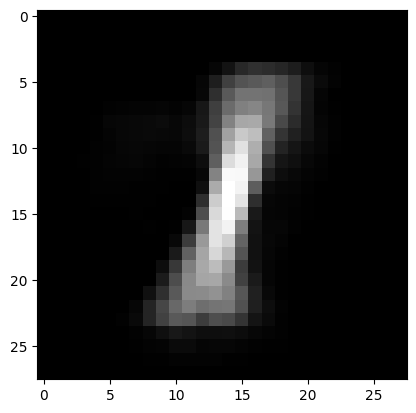

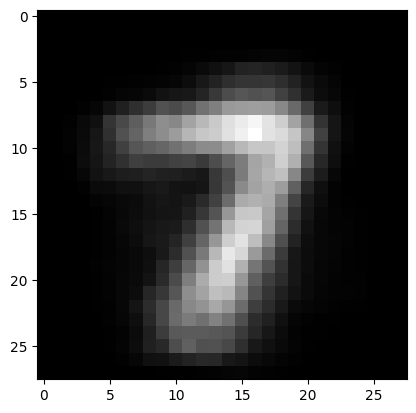

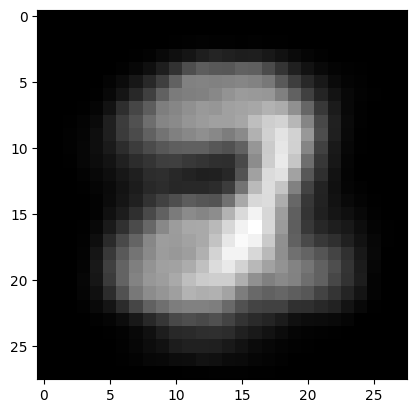

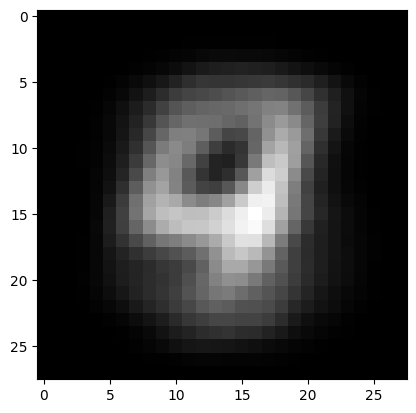

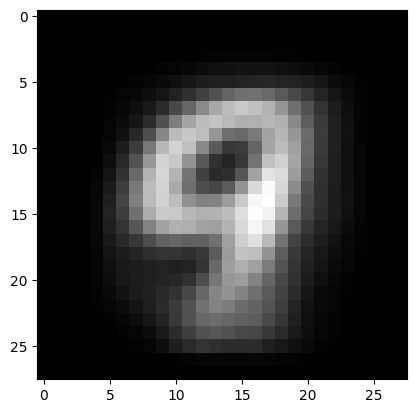

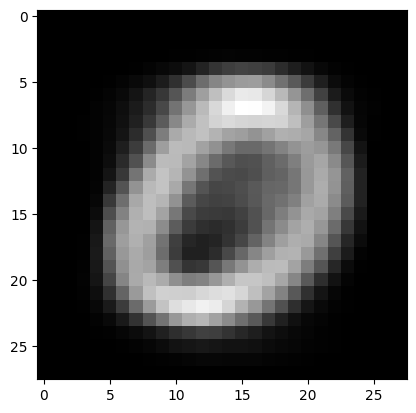

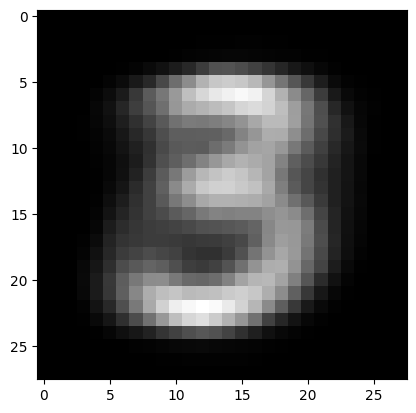

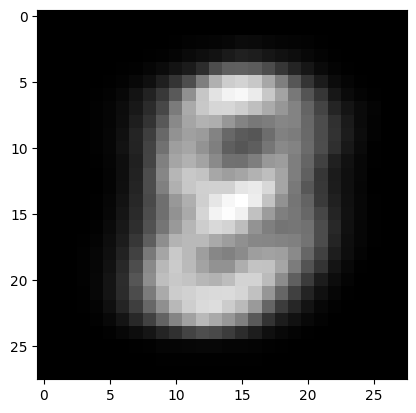

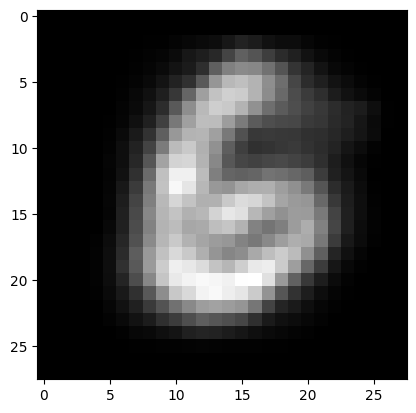

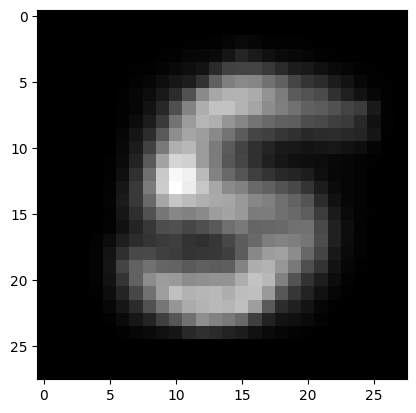

In [8]:
result = model.predict([[i] for i in list(mappings.values())])

for i in range(0,len(result)):
  plt.imshow(result[i][:,:,0],cmap='gray')
  plt.show()
  print("\n")

1/1 [==============================] - 0s 38ms/step


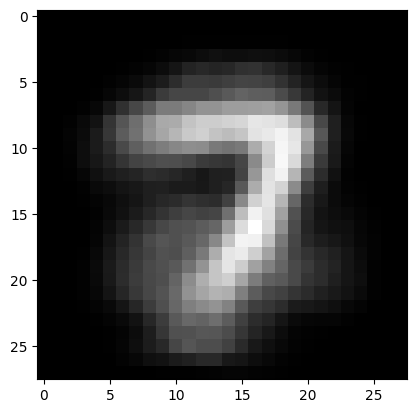

In [14]:
model.predict([[0.1]]).shape

plt.imshow(model.predict([[0.17]])[0][:,:,0],cmap='gray')
plt.show()